In [1]:
#Include Libraries:
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import seaborn as sns
from scipy import stats

In [2]:
#Read CSV Files
dataset_dir = "./Dataset/"
chotot_dataset = pd.read_csv(dataset_dir + "chotot.csv",index_col = [0])
phongtro123_dataset = pd.read_csv(dataset_dir + "phongtro123.csv",index_col=[0])
print(phongtro123_dataset.head())
print(chotot_dataset.head())

       Price  Area            Ward     District
0  1300000.0    20        Hòa Minh   Liên Chiểu
1  3000000.0    25   Nại Hiên Đông      Sơn Trà
2  1500000.0    15         Hòa Khê    Thanh Khê
3  2600000.0    30      An Hải Bắc      Sơn Trà
4  3200000.0    40   Hòa Khánh Nam   Liên Chiểu
     Price  Area  Deposit Fee        Furniture           Ward     District
0  1600000    20     500000.0              NaN   Hòa Thọ Đông       Cẩm Lệ
1  1100000    40      50000.0  Nội thất đầy đủ    Thuận Phước     Hải Châu
2  1500000    20     500000.0        Nhà trống       Hòa Phát       Cẩm Lệ
3  2500000    25    2500000.0  Nội thất đầy đủ       Hòa Minh   Liên Chiểu
4  1200000    30    1000000.0  Nội thất đầy đủ    Thuận Phước     Hải Châu


In [3]:
#Preparing Dataset for Feature Engineering
chotot_dataset = chotot_dataset.drop(columns=['Deposit Fee'])
Dataset = pd.concat([chotot_dataset, phongtro123_dataset],ignore_index=True)
print(Dataset.shape)
Dataset.head()

(1654, 5)


,Price,Area,Furniture,Ward,District
0,1600000.0,20,NaN,Hòa Thọ Đông,Cẩm Lệ
1,1100000.0,40,Nội thất đầy đủ,Thuận Phước,Hải Châu
2,1500000.0,20,Nhà trống,Hòa Phát,Cẩm Lệ
3,2500000.0,25,Nội thất đầy đủ,Hòa Minh,Liên Chiểu
4,1200000.0,30,Nội thất đầy đủ,Thuận Phước,Hải Châu


In [4]:
#Checking Nan values in Dataset
Dataset.isna().sum()

Price          20
Area            0
Furniture    1213
Ward          103
District       36
dtype: int64

In [5]:
#Splitting Continous and Categorical columns
Categorical_cols = ['Ward','District','Furniture']
Continous_cols = ['Area']

In [6]:
#Filling Nan values in these feature columns
Dataset = Dataset[Dataset['Price'].notna()]
Dataset.Furniture.fillna(value = "Nhà trống", inplace = True)
Dataset.Ward.fillna(value = " Unknown W", inplace = True)
Dataset.District.fillna(value = " Unknown D", inplace = True)
Dataset.District[Dataset.District == ' Hoà Vang'] = ' Hòa Vang'
Dataset.isna().sum()

/var/folders/2r/vgdn5c2j5fb567xb2nm5_qfm0000gn/T/ipykernel_172/1940412937.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset.District[Dataset.District == ' Hoà Vang'] = ' Hòa Vang'


Price        0
Area         0
Furniture    0
Ward         0
District     0
dtype: int64

In [7]:
#Removing Outlier in Feature Area
cols = ['Area','Price']

Q1 = Dataset[cols].quantile(0.2)
Q3 = Dataset[cols].quantile(0.8)
IQR = Q3 - Q1

Dataset = Dataset[~((Dataset[cols] < (Q1 - 1.5 * IQR)) |(Dataset[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Data Visualization

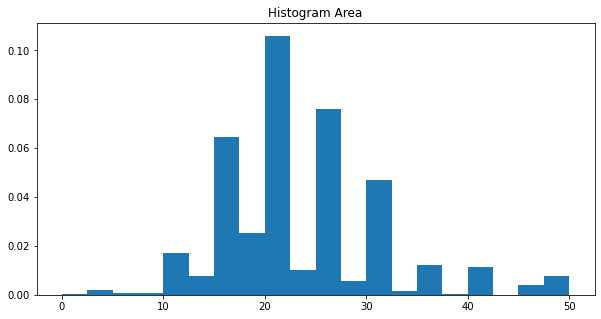

In [8]:
#Visualizing Area Feature
plt.figure(figsize = (10,5))
plt.hist(x = Dataset['Area'], bins = 20, density=True)
plt.title("Histogram Area")
plt.show()

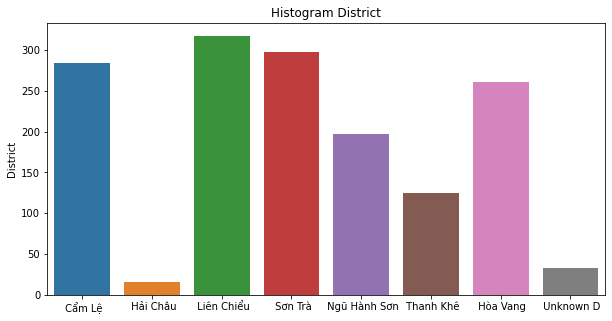

In [9]:
plt.figure(figsize = (10,5))
sns.barplot(x = Dataset['District'].unique(),y = Dataset.groupby('District')['District'].count())
plt.title("Histogram District")
plt.show()

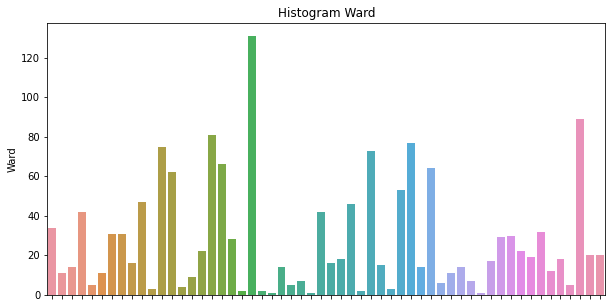

In [10]:
fig = plt.figure(figsize = (10,5))
g = sns.barplot(x = Dataset['Ward'].unique(),y = Dataset.groupby('Ward')['Ward'].count())
g.set(xticklabels=[])
plt.title("Histogram Ward")
plt.show()

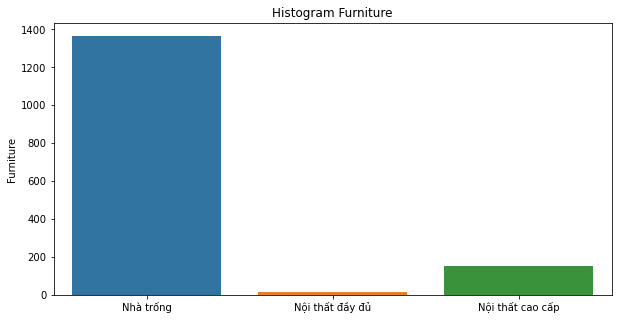

In [11]:
fig = plt.figure(figsize = (10,5))
sns.barplot(x = Dataset['Furniture'].unique(),y = Dataset.groupby('Furniture')['Furniture'].count())
plt.title("Histogram Furniture")
plt.show()

# Data Encryption

In [12]:
#Using Onehot Encoding in Categorical Columns
ohe = OneHotEncoder(sparse=False)
ohe_set = ohe.fit_transform(Dataset[Categorical_cols])
ohe_name_col = []
for i in ohe.categories_:
    ohe_name_col+=(i.tolist())

In [13]:
#Using Standard Scaler in Continous Columns
std = StandardScaler()
std_set = std.fit_transform(Dataset[Continous_cols])

In [14]:
#Concating all dataframe which we created recently:
Train_set = pd.concat([pd.DataFrame(data=ohe_set,columns=ohe_name_col), pd.DataFrame(data = std_set, columns = Continous_cols)], axis = 1)
Train_set.head()

,An Hải Bắc,An Hải Tây,An Hải Đông,An Khê,Bình Hiên,Bình Thuận,Chính Gián,Hoà Hải,Hoà Quý,Hòa An,...,Hải Châu,Liên Chiểu,Ngũ Hành Sơn,Sơn Trà,Thanh Khê,Unknown D,Nhà trống,Nội thất cao cấp,Nội thất đầy đủ,Area
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.360549
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.158928
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.360549
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.269321
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.899190


In [15]:
#Using Standard Scaler in Target column (Price)
Target_std = StandardScaler().fit(Dataset[['Price']])
Target_set = pd.DataFrame(data = Target_std.transform(Dataset[['Price']]), columns = ['Price'])
Target_set.head()

,Price
0,-0.407256
1,-1.070474
2,-0.539900
3,0.786535
4,-0.937830


# Predict

In [16]:
#Include Libraries:
from sklearn.linear_model import ridge_regression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [17]:
#Splitting dataset that 80 percent is used to train the model and 20 percent is used to evaluate it
print(Train_set.shape, Target_set.shape)
x_train, x_test, y_train, y_test = train_test_split(Train_set, Target_set, random_state=43, shuffle=True,test_size = 0.2)

(1530, 68) (1530, 1)


In [18]:
def Get_Score(algo, name):
    algo.fit(x_train,y_train)
    y_pred = algo.predict(x_test)
    x_ax = range(len(y_pred))
    original_set = Target_std.inverse_transform(y_test)
    predicted_set = Target_std.inverse_transform(y_pred)
    plt.scatter(x_ax, original_set, s = 5, color="blue", label="original")
    plt.plot(x_ax, predicted_set, color="red", label="predicted")
    plt.legend()
    plt.show()
    score = mean_squared_error(y_test,y_pred,squared = False)
    print(name,'Mean squared error: ',score)
    return predicted_set, original_set

### Light Gradient Boosting

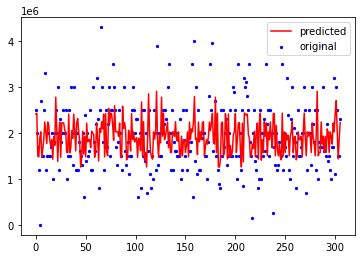

LightGradientBoosting Mean squared error:  0.84402162437241


(array([2410806.18047741, 2427113.52247245, 1496423.20412519,
        1480148.90012654, 1884887.70710816, 2023449.79890675,
        1480148.90012654, 1653648.10076272, 1854830.71531657,
        2238679.82989653, 2023449.79890675, 1769525.27389528,
        2238679.82989653, 2166908.34740524, 1841799.49576852,
        1718663.19579903, 1854830.71531657, 1430544.78400644,
        1927056.60454295, 1731202.87469053, 2777799.41295503,
        2087288.92110343, 1382383.98950853, 1930500.11086598,
        2238679.82989653, 1471282.17164282, 2215358.03768502,
        2224527.56624587, 2215358.03768502, 2058770.38101219,
        2023449.79890675, 1575639.00205805, 1573725.103051  ,
        2410806.18047741, 1571445.62174334, 1653928.50839377,
        2049345.46362715, 1884887.70710816, 2410806.18047741,
        2058770.38101219, 1608616.36076931, 2224527.56624587,
        2314339.7724088 , 2023449.79890675, 1806381.02503679,
        1259394.95349779, 1480148.90012654, 2038596.65424352,
        

In [19]:
lightgb = lgb.LGBMRegressor(n_estimators=500,
                max_depth=7,
                min_split_gain=4,
                min_child_samples=6)
Get_Score(lightgb,'LightGradientBoosting')

### Random Forest

/var/folders/2r/vgdn5c2j5fb567xb2nm5_qfm0000gn/T/ipykernel_172/384834661.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  algo.fit(x_train,y_train)


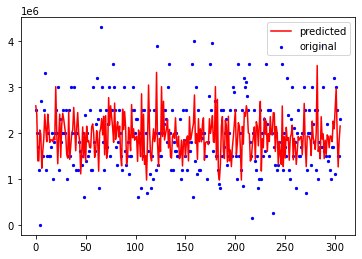

RandomForest Mean squared error:  0.8495697639902265


(array([2589323.79835509, 2407156.07044273, 1395254.16133548,
        1391224.53603556, 2064057.7425148 , 1973609.06499549,
        1233302.18493827, 1601107.65399373, 1867713.33377863,
        2407616.30040292, 2087386.47025413, 1810212.9455756 ,
        2409494.75192375, 2140472.97672399, 1796068.57538549,
        1848622.57828005, 1849531.08509628, 1812247.71807678,
        1913908.39853779, 1847909.56314342, 3007892.9119994 ,
        2007907.36740667, 1330377.30607596, 1924429.5604049 ,
        2409899.13374053, 1468876.64905938, 2176855.60256105,
        2429060.90019656, 2295111.29825114, 2122175.6079061 ,
        1954406.00889515, 1530196.58682503, 1453766.53111025,
        2473352.5553227 , 1425522.6029912 , 1699862.74997527,
        1991242.32647253, 2064057.7425148 , 2555934.10953506,
        2122175.6079061 , 1612866.62244409, 2115721.73109529,
        2442841.28589391, 1984769.89604731, 1807664.13732551,
        1110060.78306811, 1523889.66835006, 2131422.1372475 ,
        

In [20]:
RF = RandomForestRegressor(n_estimators=500,
                            max_depth=7,
                            max_features='auto',
                            verbose=0,
                            random_state=30,
                            min_samples_leaf=6,
                            oob_score=True,
                            min_samples_split=4)
Get_Score(RF, 'RandomForest')

### KNN

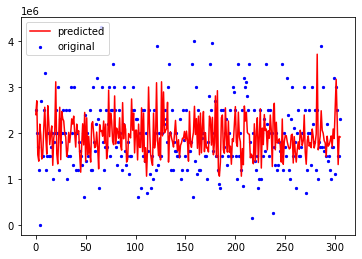

KNN Mean squared error:  0.8645226050510699


(array([[2400000.        ],
        [2700000.        ],
        [1526666.66666667],
        [1386666.66666667],
        [2193333.33333333],
        [1953333.33333333],
        [1433333.33333333],
        [1546666.66666667],
        [2106666.66666667],
        [2560000.        ],
        [1926666.66666667],
        [1540000.        ],
        [2593333.33333333],
        [2233333.33333333],
        [1746666.66666667],
        [1996666.66666667],
        [2153333.33333333],
        [1296666.66666667],
        [1886666.66666667],
        [2040000.        ],
        [3113333.33333333],
        [1553333.33333333],
        [1326666.66666667],
        [1936666.66666667],
        [2560000.        ],
        [1420000.        ],
        [2466666.66666667],
        [2313333.33333333],
        [2260000.        ],
        [1986666.66666667],
        [1913333.33333333],
        [1486666.66666667],
        [1626666.66666667],
        [2013333.33333333],
        [1793333.33333333],
        [2006666.666

In [21]:
knn = KNeighborsRegressor(n_neighbors=15)
Get_Score(knn, 'KNN')

### 

### Gradient Boosting Regressor

/Users/phanvanhung/miniforge3/envs/tfvenv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


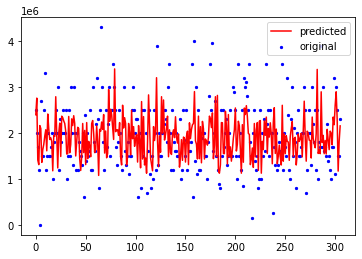

GradientBoosting Mean squared error:  0.8405775487206513


(array([2396929.1417636 , 2758490.13925602, 1412032.42433842,
        1311603.84423009, 2161229.21095555, 2097500.78041012,
        1360044.22302774, 1637832.75409199, 1752653.27546765,
        1934259.10520705, 2068301.07105999, 1611851.48871396,
        2412404.14702928, 2084753.34823473, 1859216.54695842,
        1893983.26784081, 1817126.13498626, 1177060.97832076,
        1947990.27213056, 1925652.48469612, 2788642.44543107,
        1944192.05558998, 1239286.30508909, 1995395.02227574,
        2214085.60392329, 1489285.80691938, 2365468.12917122,
        2333000.3377451 , 2261787.3916372 , 2207268.58920264,
        2039480.64553091, 1542158.66342651, 1549864.65405486,
        2359028.35528981, 1569241.2694022 , 1750315.73900754,
        2306697.59877136, 2161229.21095555, 2375664.74398524,
        2207268.58920264, 1499943.24953098, 1812491.51430641,
        2123222.27987914, 2097500.78041012, 1440995.92282724,
        1184627.77044504, 1478762.42213359, 2206292.11127962,
        

In [37]:
GBC = GradientBoostingRegressor(n_estimators=100,
                                max_features='auto')
Get_Score(GBC,'GradientBoosting')

### Voting Regressor

/Users/phanvanhung/miniforge3/envs/tfvenv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


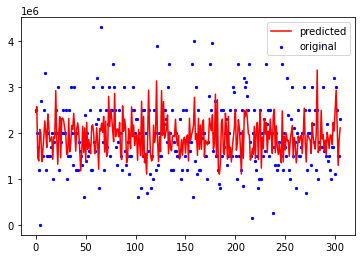

Voting Regressor Mean squared error:  0.8376830469059872


In [38]:
Voting = VotingRegressor(estimators = [('RandomForest',RF),('GradientBoosting',GBC),('knn',knn),('lightGradientBoosting',lightgb)])
predicted_set, original_set = Get_Score(Voting,'Voting Regressor')

# Result

In [ ]:
predicted_set = pd.DataFrame(data = np.ravel(predicted_set))
original_set = pd.DataFrame(data = np.ravel(original_set))
Result_set = pd.concat([predicted_set,original_set], axis = 1)
Result_set.to_csv('Result.csv')